# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.

## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Lo primero que debemos de hacer es leer los documentos presentes y descubrir como está distribuida la información dentro de ellos (ya sea abriendo los documentos a mano o desde el IDE que se guste usar). Dependiendo del orden que presenten, se deberá de trabajar más o menos para que esta información sea legible para fines de procesamiento y análisis.

Para este caso, yo abrí los documentos y me pude dar cuenta que todos los valores estaban separados por el caracter `';'`, por lo que supe que debía de definir el separador como `'sep = ;'` y así tener los datos de la forma correcta para emepezar a comprender los datos. En mi caso, usaré una combinación de las funciones `head()`, `info()` y `describe()` para tener mi segundo contacto con los datos.

In [2]:
# Importar pandas para el procesamiento de los DataFrames y numpy para el posible futuro de gráficos
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('datasets/instacart_orders.csv', sep = ';')
df_products         = pd.read_csv('datasets/products.csv', sep = ';')
df_order_products   = pd.read_csv('datasets/order_products.csv', sep = ';')
df_aisles           = pd.read_csv('datasets/aisles.csv', sep = ';')
df_departments      = pd.read_csv('datasets/departments.csv', sep = ';')

In [4]:
# mostrar información del DataFrame
print(df_instacart_orders.head())
df_instacart_orders.info()
print(df_instacart_orders.describe())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [5]:
# mostrar información del DataFrame
print(df_products.head())
df_products.info()
print(df_products.describe(include='all'))

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
 

In [6]:
# mostrar información del DataFrame
print(df_order_products.head())
df_order_products.info(show_counts = True)
print(df_order_products.describe())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.85

In [7]:
# mostrar información del DataFrame
print(df_aisles.head())
df_aisles.info()
print(df_aisles.describe(include='all'))

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
          aisle_id                  aisle
count   134.000000                    134
unique         NaN                    134
top            NaN  prepared soups salads
freq           NaN                      1
mean     67.500000                    NaN
std      38.826537                    NaN
min       1.000000                    NaN
25%      34.250000                    NaN
50%      67.500000                    NaN
75%     100.750000                

In [8]:
# mostrar información del DataFrame
print(df_departments.head())
df_departments.info()
print(df_departments.describe(include='all'))

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
        department_id department
count       21.000000         21
unique            NaN         21
top               NaN     frozen
freq              NaN          1
mean        11.000000        NaN
std          6.204837        NaN
min          1.000000        NaN
25%          6.000000        NaN
50%         11.000000        NaN
75%         16.000000        NaN
max         21.000000        NaN


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Lo primero que podemos ver es la distribución de valores nulos en cada uno de los documentos. Para nuestro caso solo 3 documentos presentan datos nulos aparentes

| \ | instacart_orders | products | order_products | aisles | departments |
| --- | -: | -: | -: | -: | -: |
| Columna | days_since_prior_order | product_name | add_to_cart_order | NA | NA |
| Valores nulos | 28,819 | 1,258 | 836 | 0 | 0 |

Lo siguiente es entender que representa cada columna de cada DataFrame y comprobar si tiene el tipo de dato correcto para su futuro procesamiento. Estas son mis conclusiones:

   - 1.- `df_nstacart_orders`
   
   
      - a)'order_id': Esta columna está como 'int64', se puede trabajar así aunque una alternativa sería cambiarla a un dato de tipo 'object'.
      
      - b)'user_id': Esta columna está como 'int64', se puede trabajar así aunque una alternativa sería cambiarla a un dato de tipo 'object'.
      
      - c)'order_number': Esta  columna está como 'int64', considero que esta correcto.
      
      - d)'order_dow': Esta columna está como 'int64', propongo cambiarlo a un dato de tipo 'object' para poder categorizarla con un tipo de dato 'category'.
      
      - e)'order_hour_of_day': Esta columna está como 'int64', propongo cambiarlo a un dato de tipo 'object' para poder categorizarla con un tipo de dato 'category'.
      
      - f)'days_since_prior_order': Esta columna está como 'float64', propongo cambiarlo a un dato de tipo 'int' ya que nos interesa la cantidad de días enteros, por lo que los decimales no nos intresan (de todas formas hay que evaluar que tanta diferencia habría si se ejecuta el cambio y evaluar si es factible).
      
      
   - 2.- `df_products`
   
   
      - a) 'product_id': Esta columna esta como 'int64', se puede trabajar así aunque una alternativa sería cambiarla a un dato de tipo 'object'.
      
      - b) 'product_name': Esta columna esta como 'object', se puede trabajar de esta forma aunque también se puede trabajar como dato 'category' (faltaría evaluar si es factible).
      
      - c) 'aisle_id': Esta columna esta como 'int64', propongo cambiarla a dato 'object' ya que los números describen un estado y no una cantidad (pensé en categorizar esta columna, pero si entiendo bien lso datos se espera agrupar esta columna en función a la columna 'department_id', haciendo que no resulte tan útil hacer esa conversión para esta columna).
      
      - d) 'department_id': Esta columna está como 'int64', propongo cambiarla a dato 'object' y despues pasarla a un dato 'category' (como tenemos pocos valores puede servirnos categorizarlos).
      
      
   - 3.- `df_order_products`
   
   
      - a) 'order_id': Esta columna está como 'int64', se puede trabajar así aunque una alternativa sería cambiarla a un dato de tipo 'object'.
      
      - b) 'product_id': Esta columna está como 'int64', se puede trabajar así aunque una alternativa sería cambiarla a un dato de tipo 'object'.
      
      - c) 'add_to_cart_order': Esta columna está como 'float64', propongo cambiarlo a un dato de tipo 'int' ya que para este dato no podemos tener posiciones fraccionarias, por lo que los decimales no nos intresan (de todas formas hay que evaluar que tanta diferencia habría si se ejecuta el cambio y evaluar si es factible).
      
      - d) 'reordered': Esta columna tiene datos tipo 'int64'. Se puede trabajar de esta forma debido a que podemos usar los valores numéricos '0 y 1' para marcar los estados 'False y True' respectivamente. De otro modo, podemos convertirlos en datos 'object' y después categorizarlos.
      
      
   - 4.- `df_aisles`
   
   
      - a) 'aisle_id': Esta columna está como 'int64', se puede trabajar así aunque una alternativa sería cambiarla a un dato de tipo 'object'.
      
      - b) 'aisle': Esta columna tiene un dato tipo 'object'. Considero que está bien así.
      
      
   - 5.- `df_departments`
   
   
      - a) 'department_id': Esta columna está como 'int64', se puede trabajar así aunque una alternativa sería cambiarla a un dato de tipo 'object'.
      
      - b) 'department': Esta columna tiene un dato tipo 'object'. Considero que está bien así.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para un pre-procesamiento de datos correcto, se deben de eliminar los valores duplicados, eliminar valores ausentes (aparentes e inesperados) y corregir el tipo de dato de cada columna para su futuro análisis.

 - Para eliminar duplicados primero hay que evaluar si existen filas duplicadas usando la combinación de funciones `'.duplicated().sum()'` al DataFrame deseado, siendo el resultado la cantidad de filas duplicadas. En caso de querer visualizarlas la indexación lógico de la forma `'dataFrame[dataFrame.duplicated() == True]'` es suficiente. Una vez hecho estos pasos, la función `'.drop_duplicates()'` eliminaría las filas no deseadas.

 - Para eliminar valores ausentes (en caso de que existan valores ausentes) se tiene que evaluar el tipo de dato en cuestión para definir que nuevo valor sería adecuado para rellenar la celda. En caso de valores numéricos la media o mediana pueden servir para rellenar celdas con valores ausentes, y en caso de valores en cadenas de texto (como nombres) con un valor 'unknown' o 'none'. No todos los datos numéricos deben de ser tratados de la misma forma porque pueden ser tanto cuantitativos como categóricos, por lo que se debe de tener cuidado con este punto.

 - Para corregir los tipos de datos de las columnas se necesita tener contexto de lo que significan los valores de cada DataFrame y comprender si la lectura de los archivos por parte de Pandas se realizo correctamente. En caso de no ser el caso, nosotros debemos de convertirlos al tipo de dato correcto para poder procesarlos y analizarlos correctamente.

No necesariamente se tiene que hacer este pre-procesamiento en este orden ni tampoco solo una vez cada paso, dependera de los datos y las estratégias que manejemos en un futuro. En mi opinión, una estratégia recomendada sería el orden: `'corregir tipo de datos'`, `'rellenar valores ausentes'` y `'eliminar duplicados'`.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(df_instacart_orders[df_instacart_orders.duplicated() == True])
print()
print('La cantidad de valores duplicados es: ' + str(df_instacart_orders.duplicated().sum()))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Se tiene un total de 15 filas duplicadas y todas reflejan compras hechas el día Miercoles a las 2:00 a.m.

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(df_instacart_orders[(df_instacart_orders['order_dow'] == 3) & (df_instacart_orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

De los 121 pedidos que se efectuaron los Miercoles a la 2:00 a.m., solo 15 son duplicados (un 12.4%). Aun así, estos duplicados solo representan un 0.003% de los valores totales del DataFrame (teniendo en cuenta los valores totales iniciales), por lo que eliminarlos no supondría ningún problema para un futuro análisis.

In [11]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates()

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(df_instacart_orders.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_instacart_orders['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Al obtener la cantidad de filas duplicadas se analizó la información, con lo que se obtuvo que para este caso mostraban una relación directa con el día y la hora en la que las compras fueron efectuadas. Depués se evaluó si la cantidad obtenida de datos era determinante para el conjunto de datos, y al concluir que no es lo determinante se optó por borrar la información duplicada.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print('Filas duplicadas: ')
print(df_products.duplicated().sum())

Filas duplicadas: 
0


In [15]:
# Revisa únicamente si hay ID de departamentos duplicados
print("IDs de departamentos duplicados: ")
print(df_products['department_id'].duplicated().sum())

IDs de departamentos duplicados: 
49673


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_uppercase'] = df_products['product_name'].str.upper()
print("Nombres de productos duplicados: ")
print(df_products['product_uppercase'].duplicated().sum())

Nombres de productos duplicados: 
1361


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
print('Valores no ausentes duplicados en el nombre de los productos: ')
print(df_products[~df_products['product_uppercase'].isna()]['product_uppercase'].duplicated().sum())

Valores no ausentes duplicados en el nombre de los productos: 
104


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aparentemente este DataFrame no presenta filas duplicadas, lo cual puede tener sentido debido a que la fila `'product_id'` no presenta valores duplicados. Aun así, debido a que tenemos la columna `'product_name'` la cual puede tener duplicados no aparentes no está de más revisar dos veces si podemos llegar a tener un error en la base de datos (puede ser posible en el resto de columnas, pero considero que en la columna 'product_name' es más probable).

Procesando la información vemos que la columna `'product_name'` tiene varios valores duplicados, los cuales son en su mayoría valores ausentes (los cuales se pueden reemplazar con un 'TBD' o 'Pending name' en mi opinión). Para los valores no ausentes duplicados tenemos un total de 104 valores. Con esto tenemos 2 posibles escenarios: 
 - Son los mismos productos, pero llenaron sus IDs de manera erronea (duplicado inesperado).
 - Son productos distintos, pero llenaron sus nombres de manera erronea.
 
Por facilidad del proyecto, optaré por la segunda opción porque es la que me permite continuar con el análisis de los datos con distintas estratégias.

A pesar de que las columnas `'aisle_id'` y `'department_id'` también presentan valores duplicados, no considero que tenga mucho sentido contarlos como duplicados ya que resulta obvio concluir que distintos productos pueden pertenecer a un mismo pasillo y/o departamento.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print('Filas duplicadas: ')
print(df_departments.duplicated().sum())

Filas duplicadas: 
0


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Cantidad de IDs de departamentos duplicados: ')
print(df_departments['department_id'].duplicated().sum())

Cantidad de IDs de departamentos duplicados: 
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores duplicados en ninguna de las filas ni en ninguna de las columnas de este DataFrame. Podemos ver esto en las lineas de código anteriores y en la linea de código `'df_departments.describre()'` del Paso 1 (marca 21 valores totales y 21 valores únicos en la columna con frecuencia 1 `department`).

No hay nada que procesar en este DataFrame.

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print('Filas duplicadas: ')
print(df_aisles.duplicated().sum())

Filas duplicadas: 
0


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
print('Cantidad de IDs de departamentos duplicados: ')
print(df_aisles['aisle_id'].duplicated().sum())

Cantidad de IDs de departamentos duplicados: 
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay valores duplicados en ninguna de las filas ni en ninguna de las columnas de este DataFrame. Podemos ver esto en las lineas de código anteriores y en la linea de código `'df_aisles.describre()'` del Paso 1 (marca 134 valores totales y 134 valores únicos en la columna con frecuencia 1 `aisle`).

No hay nada que procesar en este DataFrame.

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print('Filas duplicadas: ')
print(df_order_products.duplicated().sum())

Filas duplicadas: 
0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print('Cantidad de IDs de ordenes duplicadas: ')
print(df_order_products['order_id'].duplicated().sum())
print()
print('Cantidad de ordenes únicas: ')
print(df_order_products['order_id'].nunique())
print()
print()
print('Cantidad de IDs de productos duplicados: ')
print(df_order_products['product_id'].duplicated().sum())
print()
print('Cantidad de productos únicos: ')
print(df_order_products['product_id'].nunique())

Cantidad de IDs de ordenes duplicadas: 
4094961

Cantidad de ordenes únicas: 
450046


Cantidad de IDs de productos duplicados: 
4499434

Cantidad de productos únicos: 
45573


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aparentemente no hay filas duplicadas para este DataFrame, además analizando las columnas `'order_id'` y `'product_id'` se puede apreciar que hay duplicados en cada una de ellas. Esto por si mismo no dice nada, porque se puede presentar el caso en donde para una misma orden de compra se marque un mismo producto varias veces con un orden de entrada distínto o con un valor distinto en la columna 'reordered'. En caso de que así sea, se tendría que filtrar la base de datos de tal forma que se evalue para cada orden de compra que no haya entradas de un mismo producto más de una vez (en caso contrario significa que una o más de las entradas de ese producto en la orden de compra está mal). Por otro lado, no hay mucho caso en evaluar duplicados en las columnas `'add_to_cart_order'` y `'reordered'` debido a que es lógico que esos valores se repitan en cada una de las ordenes de compra.

Para facilidad del proyecto, asumire que un filtrado más sofísticado no será necesario y continuare suponiendo que los duplicados en las columnas `'order_id'` y `'product_id'` son el resultado de introducir un cada posible producto en una orden de compra y así para todas las ordenes de compra.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id product_uppercase
37             38          NaN       100             21               NaN
71             72          NaN       100             21               NaN
109           110          NaN       100             21               NaN
296           297          NaN       100             21               NaN
416           417          NaN       100             21               NaN
...           ...          ...       ...            ...               ...
49552       49553          NaN       100             21               NaN
49574       49575          NaN       100             21               NaN
49640       49641          NaN       100             21               NaN
49663       49664          NaN       100             21               NaN
49668       49669          NaN       100             21               NaN

[1258 rows x 5 columns]


Describe brevemente cuáles son tus hallazgos.

Al mostrar los 5 primeras y últimas filas del DataFrame se puede ver que todos los productos con nombre ausente mostrados pertenecen al pasillo 100 y al departamento 21. Falta más información para saltar a conclusiones.

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[df_products['product_name'].isna()]['aisle_id'].unique())

[100]


Describe brevemente cuáles son tus hallazgos.

Confirmamos que todos los productos con nombres ausentes están relacionados con el pasillo ID 100.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[df_products['product_name'].isna()]['department_id'].unique())

[21]


Describe brevemente cuáles son tus hallazgos.

Confirmamos que todos los productos con nombres ausentes están relacionados con el departamento ID 21.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("Valores para el departamento con ID 21: ")
print(df_departments.query("department_id == 21")['department'])
print()
print("Valores del pasillo con ID 100: ")
print(df_aisles[df_aisles['aisle_id'].isin([100])]['aisle'])

Valores para el departamento con ID 21: 
20    missing
Name: department, dtype: object

Valores del pasillo con ID 100: 
99    missing
Name: aisle, dtype: object


Describe brevemente cuáles son tus hallazgos.

Los departamentos y pasillos de los productos con nombres vacios son ambos 'missing'. Sin más información, se puede concluir que la razón por la que no tienen nombres es que no van a ser comerciados debido a que no hay ningún lugar físico en donde disponerlos (aunque para esto aún hace falta relacionar la información con los demás DataFrames para confirmar que esto sea verdad). 

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('unknown')

print(df_products['product_name'].isna().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Una vez relacionadas las filas con valores nulos con las filas de los DataFrames `'aisles.csv'` y `'departments.csv'`, podemos estar seguros de asignar un valor categórico a esas filas que represente una ausencia. De esta forma, reemplazamos todos los valores ausentes de la columna `'product_name'` de `'products.csv'` con el valor `'unknown'` y así poder manipularlos de forma eficiente en futuros pasos.

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

# Obtener los valores únicos de la columna 'order_number' para todas las filas con valores ausentes
print(df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna()]['order_number'].unique())

# Mostrar las filas que tengan valores ausentes y cuyo valor en la columna 'order number' no sea '1'
print(df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna() & ~df_instacart_orders['order_number'] == 1])

[1]
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Todas las filas donde no exista un valor en la columna 'days_since_prior_order' son donde algún usuario haya efectuado una compra por primera vez (lo cual explica porque no exista un valor).

Debido a que esta columna va a tener valores puramente numéricos, no hay razón para poner un valor a esas celdas ya que cualquier valor 'infectaría' a los resultados, por lo que se tendrá que excluir estas filas cuando se quiera hacer un procesamiento real con esta columna (a lo mucho podreemos reemplazar esas celdas con algún valor simbólico que represente que nunca ha efectuado una compra antes, por ejemplo 999, pero igual recomendaría tener este hecho en cuenta para futuros procesamientos y análisis).

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(df_order_products[df_order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Valor máximo de 'add_to_cart_order': ")
print(df_order_products['add_to_cart_order'].max())
print()
print()
print("Valor mínimo de 'add_to_cart_order': ")
print(df_order_products['add_to_cart_order'].min())

Valor máximo de 'add_to_cart_order': 
64.0


Valor mínimo de 'add_to_cart_order': 
1.0


Describe brevemente cuáles son tus hallazgos.

Usando las funciones `.max()` y `.min()` sabemos que los valores máximos y mínimos de la columna `add_to_cart_order` son 64 y 1 respectivamente.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_list = []

id_list = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']

print(id_list.shape)
id_list.nunique()

(836,)


70

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

order_products_count = df_order_products[df_order_products['add_to_cart_order'].isna()].groupby(id_list)['product_id'].count()

print(order_products_count)
print()
print("Valor mínimo del conteo: ")
print(order_products_count.min())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

Valor mínimo del conteo: 
1


Describe brevemente cuáles son tus hallazgos.

No todas las filas que tienen un valor ausente en la columna `add_to_cart_order` tienen 64 productos. Se puede ver en el código anterior que la cantidad de productos varia en todas las filas.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype('int')

# Comprobar que no hay valores ausentes en la columna 'add_to_cart_order'
print(df_order_products[df_order_products['add_to_cart_order'].isna()].head())

# Comprobamos para cada valor de la lista 'id_list' que se hayan llenado los valores ausentes y se cambiara su tipo de dato
df_order_products[df_order_products['order_id'].isin(id_list)].sample(10)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


,order_id,product_id,add_to_cart_order,reordered
3094695,3347453,25837,13,0
3570304,3308010,15984,37,1
1892757,2999801,17191,42,1
4020911,1169835,30389,52,1
1007421,2849370,6013,47,0
883470,1564093,37683,21,0
1730046,854647,24024,4,1
4143741,171934,1216,999,0
3412675,1386261,12312,999,0
3720408,1386261,25623,38,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

La única columna con valores ausentes en este DataFrame es `add_to_cart_order`. Al analizar las filas con valores ausentes, no pudimos obtener una relación entre estas y el resto de información del DataFrame, por lo que se optó por reemplazar los valores ausentes con `'valores representativos'` para no perder el resto de información de las filas. Después se cambio el dato de la columna a `'int'` porque los valores después del punto decimal no afectan al conjunto de datos, por lo que se transformó a un tipo de dato que no tiene esos valores.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Se trabajaron o no los datos en consideración del caso de cada DataFrame y sus columnas. En el primer caso, se reemplazaron los valores ausentes con una cadena de texto que represente una ausencia de valor (esto nos servirá adelante en el análisis de los datos); en el segundo caso se dejaron los datos ausentes sin rellenar porque ese mismo valor ausente representa correctamente el 'estado' de la celda (como la fila refleja la primera compra de un usuario o ususaria, tiene sentido que las celdas no tengan valor) además de que no representa ningún problema para el futuro procesamiento de este proyecto; y en el tercer caso se reemplazaron los valores ausentes con un valor considerablemente alto para mostrar un estado de ausencia (creo que esto se hizo para evitar que se presentara en las graficas posteriores debido a que la diferencia lineal entre el 64 y 999 es mucha, pero no llegue a una respuesta clara para esto).

En resumen, se debe de analizar cada conjunto de datos de manera independiente y comprender lo que significa cada columna para hacer un pre-procesamiento correcto y evitar futuros errores en el trabajo.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print("Valor máximo de 'order_hour_of_day': ")
print(df_instacart_orders['order_hour_of_day'].min())
print("Valor mínimo de 'order_hour_of_day': ")
print(df_instacart_orders['order_hour_of_day'].max())
print("Tipo de dato de 'order_hour_of_day': ")
print(df_instacart_orders['order_hour_of_day'].dtypes)

Valor máximo de 'order_hour_of_day': 
0
Valor mínimo de 'order_hour_of_day': 
23
Tipo de dato de 'order_hour_of_day': 
int64


In [37]:
print("Valor máximo de 'order_dow': ")
print(df_instacart_orders['order_dow'].min())
print("Valor mínimo de 'order_dow': ")
print(df_instacart_orders['order_dow'].max())
print("Tipo de dato de 'order_dow': ")
print(df_instacart_orders['order_dow'].dtypes)

Valor máximo de 'order_dow': 
0
Valor mínimo de 'order_dow': 
6
Tipo de dato de 'order_dow': 
int64


Escribe aquí tus conclusiones

Usando las funciones `.max()`, `.min()` y `.dtypes`, se pueden conocer los valores máximos, mínimos y el tipo de datos de las columnas `order_hour_of_day` y `order_dow`. Asi confirmamos que ambas columnas tienen valores y datos razonables, por lo que se puede trabajar con ellos.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

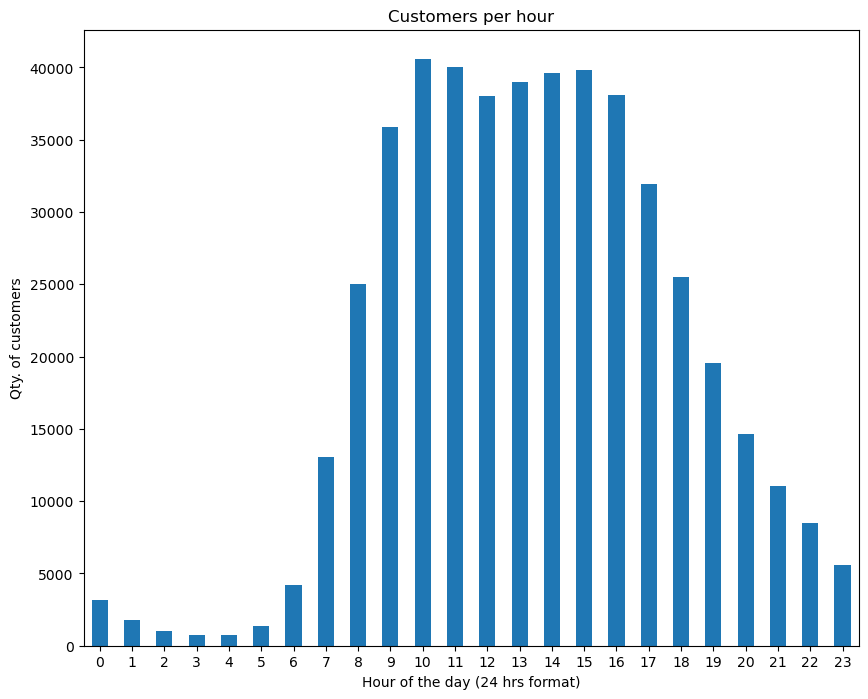

In [38]:
# Obtenemos una lista de la cantidad de usuarios que hicieron una compra en cada hora
df_hist_1 = df_instacart_orders.groupby('order_hour_of_day')['user_id'].count()

df_hist_1.plot(kind = 'bar',
               xlabel = 'Hour of the day (24 hrs format)',
               ylabel = 'Qty. of customers',
               rot = 0,
               figsize = [10, 8],
               title = 'Customers per hour')

plt.show()

Escribe aquí tus conclusiones

Se puede ver que el comportamiento de los usuarios y usuarias inician a crecer a partir de las 7:00 a.m. y baja entre las 10:00 - 11:00 p.m., teniendo una baja en la actividad considerable entre las 12:00 a.m. y las 6:00 a.m. La gráfica muestra una relación con una rutina diurna ordinaria, por lo que se podría esperar una mayor actividad en esas horas, siendo necesaria una mayor actividad por parte del personal de servicio al cliente de la compañia.

### [A3] ¿Qué día de la semana compran víveres las personas?

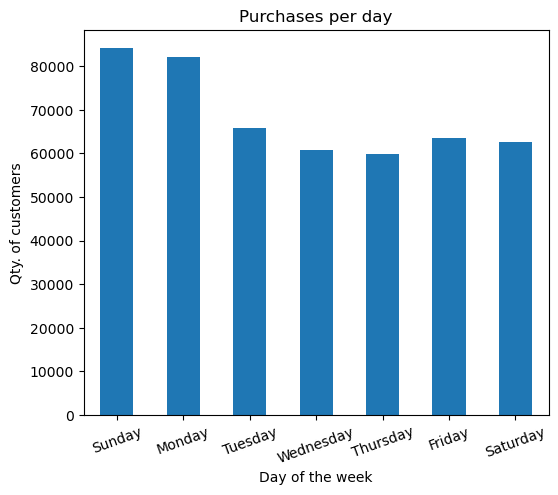

In [39]:
# Listas para los nuevos valores de los xticks y sus posiciones
x_values = [0, 1, 2, 3, 4, 5, 6]
x_labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Lista para cantidad de usuarios que hicieron una compra cada día
df_hist_2 = df_instacart_orders.groupby('order_dow')['user_id'].count()

df_hist_2.plot(kind = 'bar',
               xlabel = 'Day of the week',
               ylabel = 'Qty. of customers',
               rot = 20,
               figsize = [6, 5],
               title = 'Purchases per day')

plt.xticks(ticks = x_values, labels = x_labels)
plt.show()

Escribe aquí tus conclusiones

La actividad de compras de los usuarios y usuarias no varia abruptamente durante toda la semana, pero si se puede apreciar un ligero aumento (ligero en comparación a la actividad de la mayoría de los dias, pero puede que mi persepción sea erronea) en los días Domingo y Lunes.

Tomaría esta información para tener un aumento de personal de servivio al cliente parecida durante todos los días con un ligero aumento de un 20% para los días Domingo y Lunes y así evitar tiempo de espera largos para los clientes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [40]:
# Valor máximo y mínimo de días esperados entre compras junto a los valores únicos
print(df_instacart_orders['days_since_prior_order'].max())
print(df_instacart_orders['days_since_prior_order'].min())
print(df_instacart_orders['days_since_prior_order'].sort_values().unique())

30.0
0.0
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. nan]


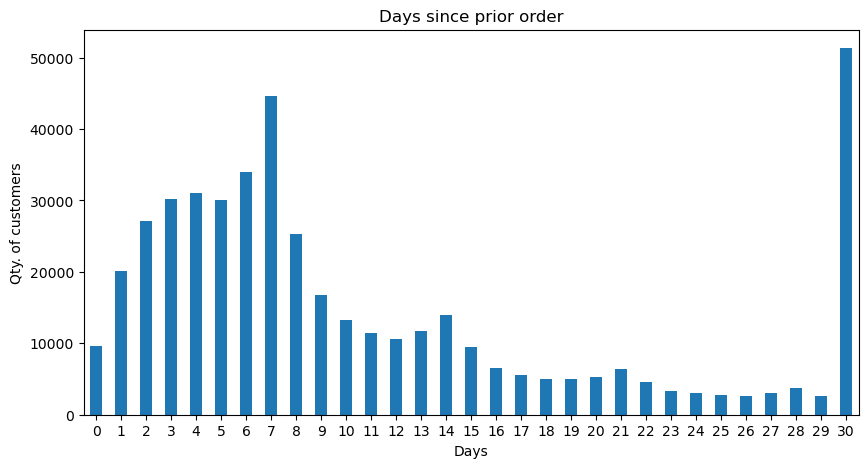

In [42]:
df_hist_3 = df_instacart_orders.groupby('days_since_prior_order')['user_id'].count()

# Variables usadas para el bucle de abajo
i = 0
x_labels_2 = []
x_pos = []

# Bucle para cambiar las etiquetas de la gráfica a valores enteros sin manipular la columna 
for element in df_instacart_orders['days_since_prior_order'].sort_values().unique():
    try:
       x_labels_2.append(str(int(element / 1)))
    except:
        print("")

# Bucle para obtener las posiciones de las nuevas etiquetas de la gráfica
while i < df_instacart_orders['days_since_prior_order'].nunique():
    x_pos.append(i)
    i += 1

df_hist_3.plot(kind = 'bar',
               xlabel = 'Days',
               ylabel = 'Qty. of customers',
               rot = 0,
               figsize = [10,5],
               title = 'Days since prior order')

plt.xticks(ticks = x_pos, labels = x_labels_2)
plt.show()

Escribe aquí tus conclusiones

De esta imagen tenemos 3 comportamientos principales en los usuarios y usuarias:
 - 1.- Un gran número de los clientes toma periodos de tiempo largos entre compras, como se puede apreciar en el pico más alto usuarios en el valor 30.
 - 2.- De no ser el caso, comunmente los clientes tomas periodos de tiempo dentro de una semana para efectuar compras, como se ve en que el mayor conjunto de los datos se encuentra dentro de los valores 0 y 7.
 - 3.- En menor medida, los usuarios tienden a efectuar una segunda compra después de 1 a 2 semanas. Se aprecia esto debido a que el conjunto de 8 a 14 días muestra una muestra, que si bien es pequeña en comparación a las muestras de los primeros 2 puntos, representa un buen porcentaje de los datos.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
# Obtener valores para el día Miércoles
df_orders_wednesday = df_instacart_orders[df_instacart_orders['order_dow'] == 3].groupby('order_hour_of_day')['user_id'].count()

# Obtener valores para el día Sábado
df_orders_saturday = df_instacart_orders[df_instacart_orders['order_dow'] == 6].groupby('order_hour_of_day')['user_id'].count()

In [44]:
# Combinamos ambas listas en un DataFrame
df_days_of_week = pd.concat([df_orders_wednesday, df_orders_saturday], axis = 'columns')

# Cambiamos las etiquetas a valores más descriptivos
df_days_of_week.columns = ['users_wednesday', 'users_saturday']

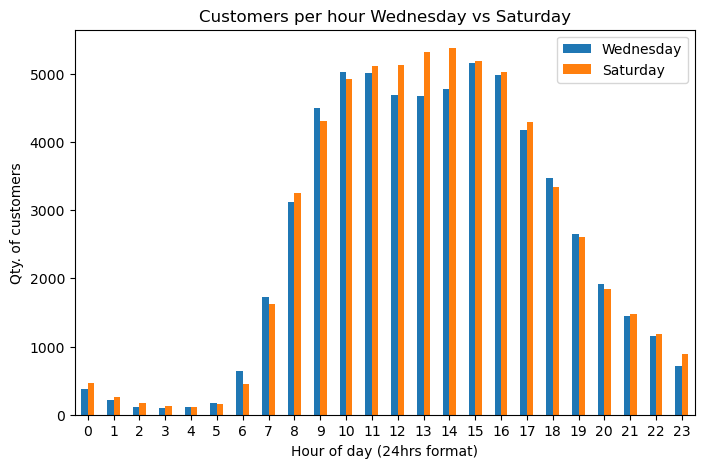

In [46]:
df_days_of_week.plot(kind = 'bar',
                     y = ['users_wednesday', 'users_saturday'],
                     xlabel = 'Hour of day (24hrs format)',
                     ylabel = 'Qty. of customers',
                     rot = 0,
                     figsize = [8,5],
                     title = 'Customers per hour Wednesday vs Saturday')

plt.legend(['Wednesday', 'Saturday'])
plt.show()

Escribe aquí tus conclusiones

Ambos días presentan una actividad similar (parecida a una campana de Gauss) en las compras pero con ligeras diferencias en las horas del día cercas de las 12:00 p.m. Se podría suponer que esto se debe a que una mayor cantidad de usuarios y usuarias tienen más tiempo libre el Sábado, pero se debe de profundizar con más información para confirmar esta hipótesis.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
# Obtenemos la cantidad de ordenes por usuario
df_orders_distribution = df_instacart_orders.groupby('user_id')['order_id'].count()

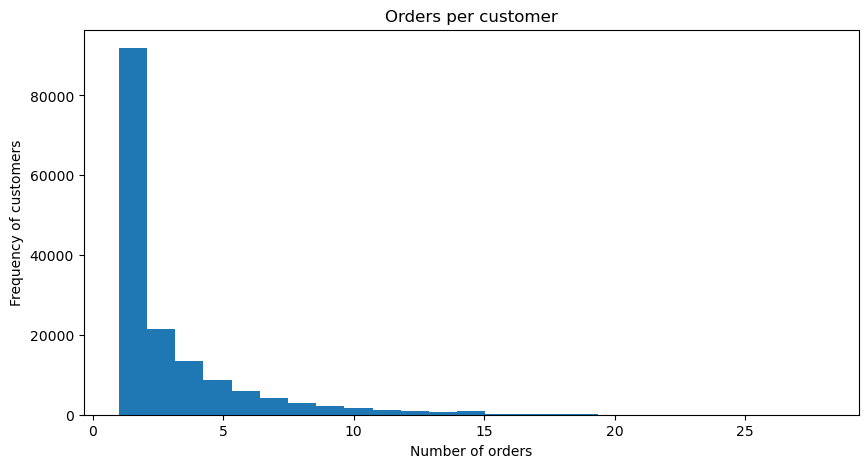

In [48]:
df_orders_distribution.plot(kind = 'hist',
                            bins = 25,
                            xlabel = 'Number of orders',
                            ylabel = 'Frequency of customers',
                            rot = 0,
                            figsize = [10, 5],
                            title = 'Orders per customer')

plt.show()

Escribe aquí tus conclusiones

La gran mayoría de los usuarios y usuarias han efectuado 5 compras o menos, y la gran minoría han efectuado más de 5 compras. Existen casos donde usuarios han hecho muchas más compras que la mayoría, pero son muy escasas (hasta 28 compras).

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
# Creamos un DataFrame vacio
popular_products = pd.DataFrame({})

# Obtenemos una lista descendente de los productos más populares y guardamos el indice
# en la columna product_id del DataFrame vacio
popular_products['product_id'] = df_order_products.groupby('product_id')['order_id'].count().sort_values(ascending=False).index

In [50]:
# Hacemos inner merge con el DF de productos para obtener el nombre de los productos
complete_popular_products = popular_products.merge(df_products, on='product_id')

# Nos deshacemos de las columnas innecesarias
complete_popular_products = complete_popular_products.drop(['product_name','aisle_id', 'department_id'], axis='columns')

In [51]:
print(complete_popular_products.head(20))

    product_id         product_uppercase
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


Escribe aquí tus conclusiones

La lista de los productos más populares muestra una clara tendencia en `productos orgánicos` o de `origen animal`. Esto significa que nuestros clientes prefieren este tipo de productos y puede que si aumentemos nuestro inventario en estas categorías aumenten las ventas (se necesitan más datos para confirmar esto).

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
# Obtenbemos la cantidad promedio de productos comprados por orden de compra
mean_distribution = df_order_products['product_id'].count() / df_order_products['order_id'].nunique()
print("Customers bought an average of: " + str(int(mean_distribution)) + " products.")

Customers bought an average of: 10 products.


In [53]:
# Obtenemos el número de artículos comprados en cada orden de compra
df_mean = df_order_products.groupby('order_id')['product_id'].count()
print(df_mean)

# Lineas para asegurarme de la información (no afectan al código)
print(df_order_products[df_order_products['add_to_cart_order'] != 999]['add_to_cart_order'].max())
print(df_order_products[df_order_products['add_to_cart_order'] == 64]['add_to_cart_order'].count())

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64
64
75


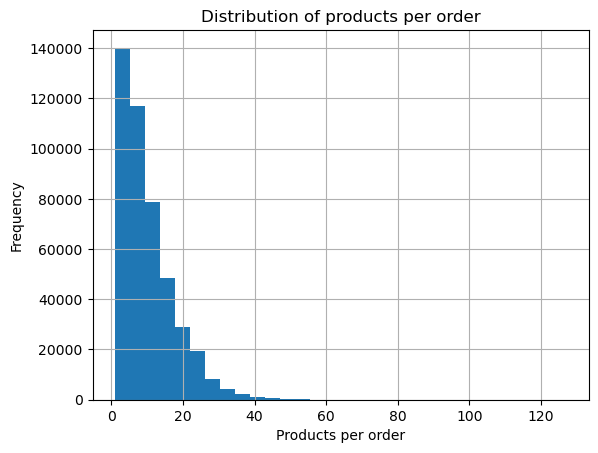

In [54]:
df_mean.plot(kind = 'hist',
            bins = 30,
            xlabel = 'Products per order',
            ylabel = 'Frequency',
             grid = True,
            title = 'Distribution of products per order')

plt.show()

Escribe aquí tus conclusiones

Si bien se aprecia que la gran mayoría de los clientes compran 10 productos o menos (como se ve en el histograma), considero seguro concluir que una cifra óptima de productos por compra sería 20, siendo las compras con más productos una cifra considerablemente pequeña en comparación.

Para fomentar la compra de estas cantidades, puede que el uso de cupones para compras superiores a 10 productos aumente las ventas.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
# Creamos un DataFrame vacio
reordered_df = pd.DataFrame({})

# Obtenemos una lista con la cantidad de productos que más se repiten en las compras, obtenemos su product_id
# y lo guardamos en el DataFrame vacio
reordered_df['product_id'] = df_order_products.groupby('product_id')['reordered'].sum().sort_values(ascending=False).index
print(reordered_df.head(20))

    product_id
0        24852
1        13176
2        21137
3        21903
4        47209
5        47766
6        27845
7        47626
8        27966
9        16797
10       26209
11       22935
12       24964
13       45007
14       49683
15       28204
16        8277
17       39275
18        5876
19       49235


In [56]:
# Hacemos inner merge con el DF de productos y borramos las columnas innecesarias
reordered_merge = reordered_df.merge(df_products, on = 'product_id').drop(['product_name', 'aisle_id', 'department_id'], axis = 'columns')

In [57]:
print(reordered_merge.head(20))

    product_id         product_uppercase
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        27845        ORGANIC WHOLE MILK
7        47626               LARGE LEMON
8        27966       ORGANIC RASPBERRIES
9        16797              STRAWBERRIES
10       26209                     LIMES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       49683            CUCUMBER KIRBY
15       28204        ORGANIC FUJI APPLE
16        8277  APPLE HONEYCRISP ORGANIC
17       39275       ORGANIC BLUEBERRIES
18        5876             ORGANIC LEMON
19       49235       ORGANIC HALF & HALF


Escribe aquí tus conclusiones

Similar al punto de los 20 productos más populares, se ve que los 20 productos quemás sevuelven a comprar son en su mayoría (por no decir todos) de las mismas categorías: `orgánicos` y `origen animal`.

Esto hace ganar peso a la estrategia de aumentar los productos de esas categorías para aumentar las ventas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [58]:
# Obtenemos el promedio (base 100) de productos comprados y de productos repetidos en cada orden de compra
product_order = df_order_products.groupby('product_id')['reordered'].count() / df_order_products['order_id'].nunique() * 100
product_reordered = df_order_products.groupby('product_id')['reordered'].sum() / df_order_products['order_id'].nunique() * 100

print(product_order.sort_values(ascending=False).head(5))
print()
print(product_reordered.sort_values(ascending=False).head(5))

product_id
24852    14.676278
13176    11.842567
21137     8.230048
21903     7.548340
47209     6.615546
Name: reordered, dtype: float64

product_id
24852    12.390511
13176     9.876768
21137     6.363572
21903     5.828960
47209     5.250352
Name: reordered, dtype: float64


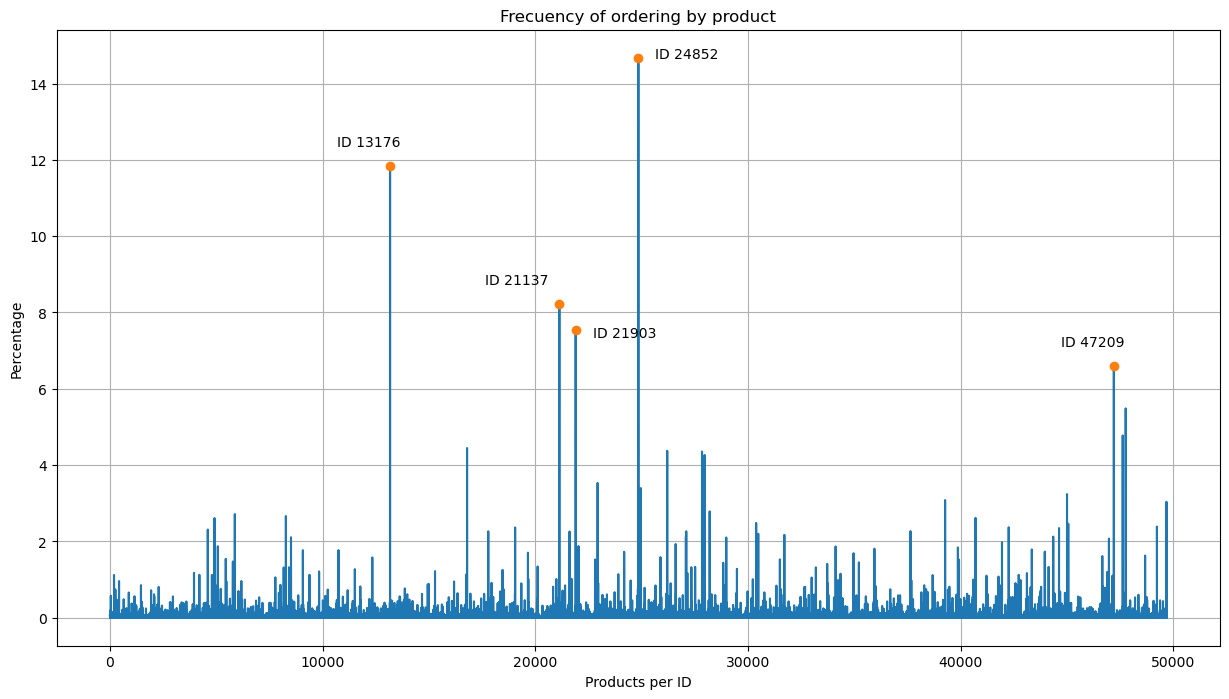

In [61]:
# Puntos 'x' y 'y' para los 5 picos que representan los productos más comprados
x = [24852, 13176, 21137, 21903, 47209]
y = [14.67, 11.84, 8.23, 7.54, 6.61]

product_order.plot(grid=True, figsize = [15, 8], xlabel='Products per ID', ylabel='Percentage', title='Frecuency of ordering by product')
plt.plot(x, y, marker='o', linewidth=0)
plt.text(x[0]+800, y[0], 'ID 24852')
plt.text(x[1]-2500, y[1]+0.5, 'ID 13176')
plt.text(x[2]-3500, y[2]+0.5, 'ID 21137')
plt.text(x[3]+800, y[3]-0.2, 'ID 21903')
plt.text(x[4]-2500, y[4]+0.5, 'ID 47209')
plt.show()

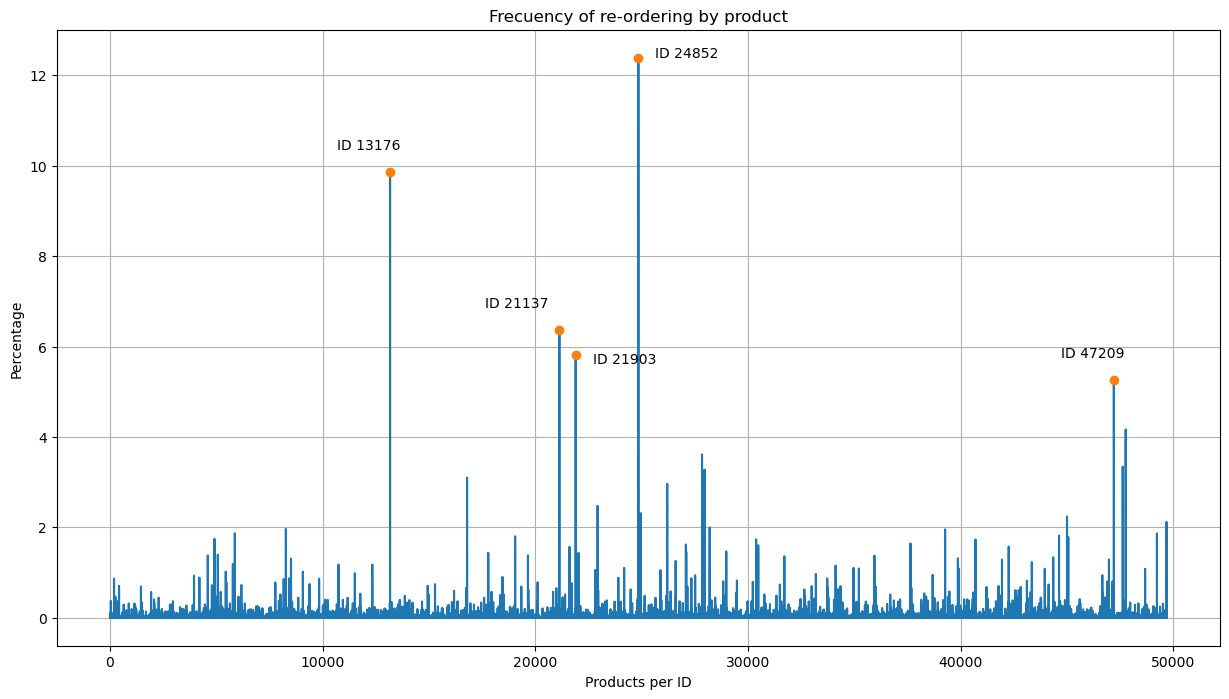

In [62]:
# Puntos 'x' y 'y' para los 5 picos que representan los productos más repetidos
x = [24852, 13176, 21137, 21903, 47209]
y = [12.39, 9.87, 6.36, 5.82, 5.25]

product_reordered.plot(grid=True, figsize = [15, 8], xlabel='Products per ID', ylabel='Percentage', title='Frecuency of re-ordering by product')
plt.plot(x, y, marker='o', linewidth=0)
plt.text(x[0]+800, y[0], 'ID 24852')
plt.text(x[1]-2500, y[1]+0.5, 'ID 13176')
plt.text(x[2]-3500, y[2]+0.5, 'ID 21137')
plt.text(x[3]+800, y[3]-0.2, 'ID 21903')
plt.text(x[4]-2500, y[4]+0.5, 'ID 47209')
plt.show()

Escribe aquí tus conclusiones

Las gráficas de lineas muestran las `'probabilidades'` (creo que a eso se refería con `'proporción'`) de que un producto activo sea comprado y que un producto activo sea re-comprado. Para ambos casos se presentan los 5 productos más populares y que vuelven a repetirse con frecuencia (presentando los 5 picos para ambas imágenes).

El producto más popular `'BANANA'` tiene una probabilidad del `14.67% de ser comprado` y un `12.39% de ser re-comprado` en cada compra que se registra.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [64]:
# Creamos un DataFrame vacio
mean_reordered_df = pd.DataFrame({})

#Obtenemos el valor promedio de productos repetidos presentes en una orden de compra
mean_reordered_df['mean_reordered_per_order'] = df_order_products.groupby('order_id')['reordered'].mean()
mean_reordered_df.reset_index()

# Hacemos inner merge con el DF de las ordenes de compra para obtener la columna de 'user_id'
mean_merged_df = mean_reordered_df.merge(df_instacart_orders, on='order_id')

# Usamos el promedio anterior para obtener el promedio de productos repetidos por cliente (base 100)
user_mean = mean_merged_df.groupby('user_id')['mean_reordered_per_order'].mean() * 100
user_mean.min()

0.0

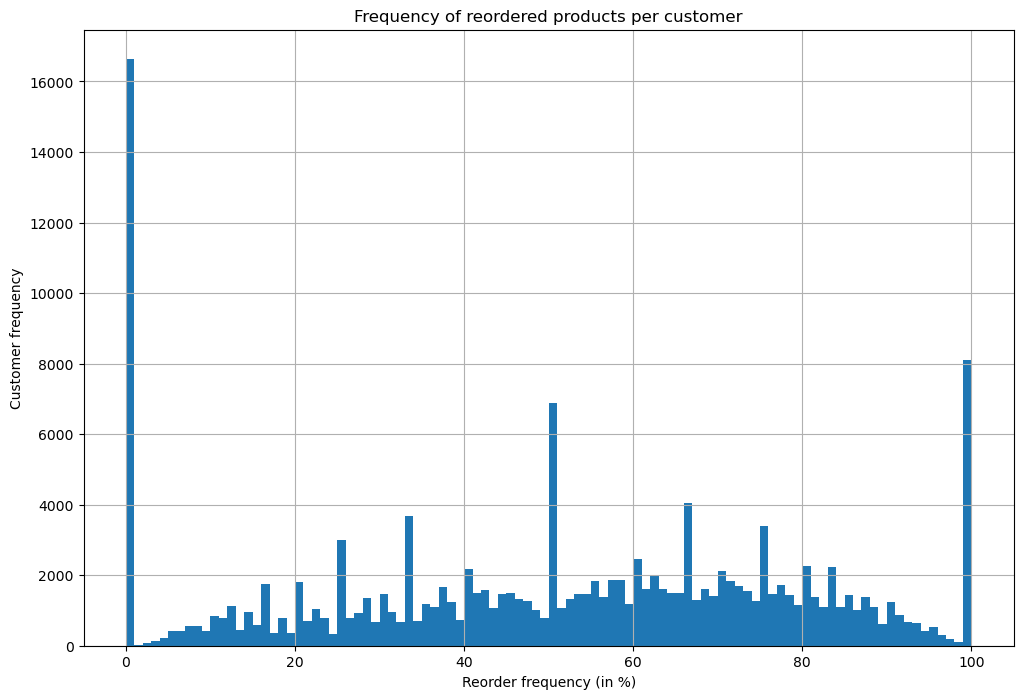

In [65]:
user_mean.plot(kind='hist', 
               xlabel = 'Reorder frequency (in %)', 
               ylabel = 'Customer frequency', 
               title = 'Frequency of reordered products per customer', 
               bins = 100, 
               figsize = [12, 8],
               grid = True)

plt.show()

Escribe aquí tus conclusiones

En este histograma se aprecian varios picos para la tasa de productos repetidos entre ordenes para los clientes. Se tiene el pico más grande en 0% de productos repetidos (seguramente de clientes que solo han hecho una compra y que se explica con las imágenes anteriores debido a que la gran mayoría de usuarios tienen pocas compras), seguido de un pico en el 100% (seguramente de clientes que tienen mucho tiempo en la plataforma y que estaban registrados antes de estos datos) y depués un pico alrededor de 50% (seguramente de usuarios ocasionales). Fuera de estos picos se tienen picos menores.

Comprendo que la gráfica explica que la mayoría de los usuarios y usuarias muestran una distribución homogénea y seguramente sea difícil sacar conclusiones con esta gráfica por si misma.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [66]:
# Creamos un DataFrame vacio
first_product_df = pd.DataFrame({})

# Contamos la cantidad de veces que cada producto ha sido introducido al carrito de compra como primer objeto
first_product_df['counts'] = df_order_products[df_order_products['add_to_cart_order'] == 1]['product_id'].value_counts()

# Generamos una nueva columna de product_id con el viejo indice del DataFrame y cambiamos su nombre
first_product_df = first_product_df.reset_index()
first_product_df.columns = ['product_id', 'values']
first_product_df.head(20)

,product_id,values
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


In [67]:
# Hacemos innner merge con el DF de productos para obtener el nombre de los productos
merged_first_products_df = first_product_df.merge(df_products, on='product_id')

# Borramos las columnas innecesarias
merged_first_products_df = merged_first_products_df.drop(['product_name', 'aisle_id', 'department_id'] ,axis = 'columns')

In [68]:
merged_first_products_df.head(20)

,product_id,values,product_uppercase
0,24852,15562,BANANA
1,13176,11026,BAG OF ORGANIC BANANAS
2,27845,4363,ORGANIC WHOLE MILK
3,21137,3946,ORGANIC STRAWBERRIES
4,47209,3390,ORGANIC HASS AVOCADO
5,21903,3336,ORGANIC BABY SPINACH
6,47766,3044,ORGANIC AVOCADO
7,19660,2336,SPRING WATER
8,16797,2308,STRAWBERRIES
9,27966,2024,ORGANIC RASPBERRIES


Escribe aquí tus conclusiones

Se ve una tendencia marcada para productos `orgánicos` y de `origen animal` en los productos que los usuarios y usuarias eligen primero (marcando que los productos mencionados ya han estado entre los más populares para 4 hipótesis del proyecto). 

Seguramente una aumento en productos de estas categorías y adaptar la página para que sea más fácil encontrar este tipo de productos estaría relacionado a un aumento en las ventas, pero aun falta información para confirmarlo.

### Conclusion general del proyecto:

En este proyecto se trabajó con datos de InstaCart, que si bien han sido manipulados para fines didácticos, han servido de ejemplo para poder entender, pre-procesar, y manipular los datos presentes. Se llegaron a conclusiones interesantes respecto a que los usuarios y usuarias mostraron una clara aceptación hacia productos orgánicos y de origen animal, así como tambien que seguramente nos interese hacer que las personas hagan más compras debido a la baja tendencia de actividad para la mayoría de los usuarios.

Estas conclusiones pueden ser usadas para tomar decisiones de negocio respecto a posibles futuras campañas para aumentar las ventas (ya sea con cupones de descuento o campañas con marcas de productos orgánicos y de origen animal) o el aumentar inventario de una categoría de productos en específico.